# Import Libraries

In [92]:
import pandas as pd
from scipy import stats
import matplotlib.pyplot as plt
import numpy as np
from datetime import datetime

In [93]:
def calculate_age(born, given=pd.Timestamp('now').normalize().date()):
    born = datetime.strptime(born, "%m/%d/%Y").date()
    today = pd.Timestamp('now').normalize().date()
    if given != today:
        return given.year - born.year - ((given.month, given.day) < (born.month, born.day))
    return today.year - born.year - ((today.month, today.day) < (born.month, born.day))

# df['age'] = df['dob'].apply(calculate_age)

# Import Data

In [94]:
player_40_df = pd.read_csv('data\parsa\player table40.csv')
player_50_df = pd.read_csv('data\parsa\player table50.csv')
player_75_df = pd.read_csv('data\parsa\player table75.csv')
player_157_df = pd.read_csv('data\parsa\player table157.csv')
player_189_df = pd.read_csv('data\parsa\player table189.csv')

In [95]:
players_table_df = pd.concat([player_40_df, player_50_df, player_75_df, player_157_df, player_189_df], axis=0).drop(columns='Unnamed: 0')

In [96]:
player_stats_40 = pd.read_csv('data\parsa\statistics table_40.csv')
player_stats_50 = pd.read_csv('data\parsa\statistics table50.csv')
player_stats_75 = pd.read_csv('data\parsa\statistics table75.csv')
player_stats_157 = pd.read_csv('data\parsa\statistics table157.csv')
player_stats_189 = pd.read_csv('data\parsa\statistics table189.csv')


In [97]:
players_stats_df = pd.concat([player_stats_40, player_stats_50, player_stats_75, player_stats_157, player_stats_189], axis=0).drop(columns='Unnamed: 0')
players_stats_df = players_stats_df[players_stats_df.Competition.isin(['Premier League', 'Bundesliga', 'Serie A', 'Ligue 1', 'LaLiga'])]
players_stats_df = players_stats_df[players_stats_df.Season.isin(['21/22', '20/21', '19/20', '18/19', '17/18', '16/17'])].reset_index(drop=True)

# Preprocessing

## Birth Date in player_table

In [99]:
# year extract
year_serie = players_table_df.birth_date.apply(lambda ldate:ldate.split(',')[2].split(']')[0].split("'")[1])
players_table_df['birth_year'] = year_serie.astype('int')

## Gorup postitions in player table

In [100]:
players_table_df.drop_duplicates(['player_id'], inplace=True)

In [101]:
players_table_df.groupby('main_position').player_id.count()

main_position
Attack                           1
Attack Centre Forward          483
Attack Left Winger             233
Attack Right Winger            224
Attack Second Striker           27
Defender Centre Back           642
Defender Left Back             269
Defender Right Back            301
Goalkeeper                     442
midfield                         1
midfield Attacking Midfield    234
midfield Central Midfield      483
midfield Defensive Midfield    284
midfield Left Midfield          21
midfield Right Midfield         28
Name: player_id, dtype: int64

In [102]:
Attack_list = players_table_df.groupby('main_position').player_id.count().index.tolist()[0:5]
Defender_list = players_table_df.groupby('main_position').player_id.count().index.tolist()[5:8]
midfield_list = players_table_df.groupby('main_position').player_id.count().index.tolist()[9:]

In [103]:
players_table_df.main_position.replace(Attack_list, Attack_list[0]).value_counts()

main_position
Attack                         968
Defender Centre Back           642
midfield Central Midfield      483
Goalkeeper                     442
Defender Right Back            301
midfield Defensive Midfield    284
Defender Left Back             269
midfield Attacking Midfield    234
midfield Right Midfield         28
midfield Left Midfield          21
midfield                         1
Name: count, dtype: int64

In [104]:
players_table_df['position_group'] = players_table_df.main_position.replace(Attack_list, Attack_list[0]).replace(Defender_list, 'Defender').replace(midfield_list, midfield_list[0])

[Text(0, 0, '968'), Text(0, 0, '1212'), Text(0, 0, '442'), Text(0, 0, '1051')]

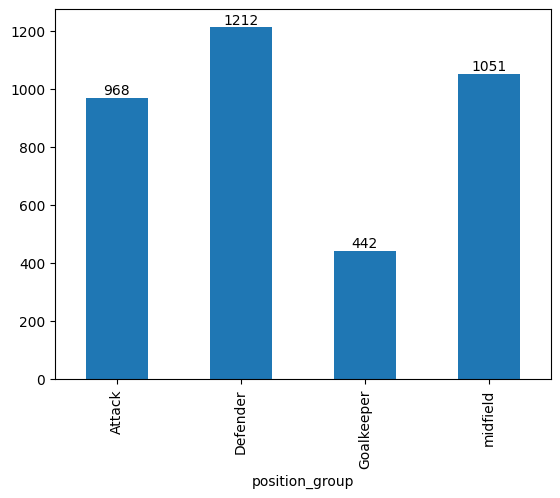

In [105]:
ax = players_table_df.groupby('position_group').player_id.count().plot(kind='bar')
ax.bar_label(ax.containers[0])

## Remove duplicated rows from players_stats_df

In [106]:
len(players_stats_df)

27713

In [107]:
players_stats_df[players_stats_df.duplicated(['player_id', 'Season','Competition','Club'], keep=False)].sort_values(by=['Season','Club'])

,player_id,Season,Competition,Club,Squad,Appearances,PPG,Goals,Own goals,Substitutions on,Substitutions off,Yellow cards,Second yellow cards,Red cards,Goals conceded,Clean sheets,Minutes played,Assists,Penalty goals,Minutes per goal
5482,270541,16/17,Bundesliga,1.FC Köln,10,6,0.50,-,-,6,-,2,-,-,NaN,NaN,79',-,-,-
10430,270541,16/17,Bundesliga,1.FC Köln,10,6,0.50,-,-,6,-,2,-,-,NaN,NaN,79',-,-,-
20820,270541,16/17,Bundesliga,1.FC Köln,10,6,0.50,-,-,6,-,2,-,-,NaN,NaN,79',-,-,-
2935,189441,16/17,Serie A,AC Milan,16,12,1.08,-,-,8,2,3,-,-,NaN,NaN,533',2,-,-
2960,111961,16/17,Serie A,AC Milan,35,34,1.65,7,-,1,8,5,-,-,NaN,NaN,2.820',9,-,403'
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2455,204103,21/22,Premier League,Wolverhampton Wanderers,21,20,1.55,1,-,10,6,-,-,-,NaN,NaN,1.062',-,-,1.062'
7403,204103,21/22,Premier League,Wolverhampton Wanderers,21,20,1.55,1,-,10,6,-,-,-,NaN,NaN,1.062',-,-,1.062'
15147,204103,21/22,Premier League,Wolverhampton Wanderers,21,20,1.55,1,-,10,6,-,-,-,NaN,NaN,1.062',-,-,1.062'
17793,204103,21/22,Premier League,Wolverhampton Wanderers,21,20,1.55,1,-,10,6,-,-,-,NaN,NaN,1.062',-,-,1.062'


In [108]:
players_stats_df.drop_duplicates(['player_id', 'Season','Competition','Club'], inplace=True)

In [109]:
len(players_stats_df)

12258

## Modify player_stats Minutes played and Minutes per goal features

In [110]:
for features in ['Minutes played', 'Minutes per goal']:
    players_stats_df[features] = players_stats_df[features].str.replace('-', '0').fillna('0')
    players_stats_df[features] = players_stats_df[features].str.replace('.', '').str.replace("'", '')
    players_stats_df[features] = players_stats_df[features].astype('int')


## Modify other player_stats features datatypes

In [111]:
for features in players_stats_df:
    try:
        if players_stats_df[features].dtype == 'object' and '-' in players_stats_df[features].unique():
            players_stats_df[features] = players_stats_df[features].str.replace('-', '0')
            players_stats_df[features] = players_stats_df[features].astype('int')
    except:
        continue


In [112]:
players_stats_df.PPG = players_stats_df.PPG.str.replace('0,00','0.0')
players_stats_df.PPG = players_stats_df.PPG.astype('float')

In [113]:
print(players_stats_df.select_dtypes('object').columns[3:].tolist())

for features in players_stats_df.select_dtypes('object').columns[3:].tolist():
    players_stats_df[features].fillna('0', inplace=True)
    players_stats_df[features] = players_stats_df[features].astype('int')

['Goals conceded', 'Clean sheets', 'Assists', 'Penalty goals']


In [114]:
players_stats_df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 12258 entries, 0 to 27712
Data columns (total 20 columns):
 #   Column               Non-Null Count  Dtype  
---  ------               --------------  -----  
 0   player_id            12258 non-null  int64  
 1   Season               12258 non-null  object 
 2   Competition          12258 non-null  object 
 3   Club                 12258 non-null  object 
 4   Squad                12258 non-null  int64  
 5   Appearances          12258 non-null  int32  
 6   PPG                  12258 non-null  float64
 7   Goals                12258 non-null  int32  
 8   Own goals            12258 non-null  int32  
 9   Substitutions on     12258 non-null  int32  
 10  Substitutions off    12258 non-null  int32  
 11  Yellow cards         12258 non-null  int32  
 12  Second yellow cards  12258 non-null  int32  
 13  Red cards            12258 non-null  int32  
 14  Goals conceded       12258 non-null  int32  
 15  Clean sheets         12258 non-null  int3

## players_transfers_df

In [115]:
players_transfers_df = players_transfers_df[players_transfers_df.season >=2016]

# Merging Data

## Add club_id

In [116]:
id_df = pd.read_csv('data\club_ids101.csv')

In [117]:
id_df

,Unnamed: 0,club_id,club full name,club name
0,0,281,Manchester City,Man City
1,1,631,Chelsea FC,Chelsea
2,2,9250,Chelsea FC U21,Chelsea U21
3,3,11,Arsenal FC,Arsenal
4,4,31,Liverpool FC,Liverpool
...,...,...,...,...
96,96,1005,US Lecce,Lecce
97,97,3522,Spezia Calcio,Spezia Calcio
98,98,276,Hellas Verona,Hellas Verona
99,99,1038,UC Sampdoria,Sampdoria


In [118]:
new_df = pd.merge(players_stats_df, id_df, left_on = 'Club', right_on= 'club full name').drop(columns=['Unnamed: 0', 'club full name', 'club name'])

## Investigate about New_season on new club

In [119]:
new_df = new_df.sort_values(by=['player_id', 'Season']).reset_index(drop=True)

In [120]:
result = []
for pid in new_df.player_id.unique().tolist():
    seasons = new_df[new_df.player_id == pid].Season.tolist()
    # print(pid)
    for j, s in enumerate(seasons):
        # print(j, s)
        c_cid = new_df[(new_df.player_id == pid) & (new_df.Season == s)].club_id.values[0]
        if j == 0:
            p_cid = c_cid
        else:
            p_cid = new_df[(new_df.player_id == pid) & (new_df.Season == seasons[j-1])].club_id.values[0]
        
        if c_cid != p_cid:
            result.append({'player_id':pid, 'seasons':seasons[j], 'club_id':c_cid, 'New_season':True})
        else:
            result.append({'player_id':pid, 'seasons':seasons[j], 'club_id':c_cid, 'New_season':False})

status_df = pd.DataFrame(result)

In [121]:
status_df

,player_id,seasons,club_id,New_season
0,2857,17/18,1003,False
1,2857,21/22,1003,False
2,3333,16/17,31,False
3,3333,17/18,31,False
4,3333,18/19,31,False
...,...,...,...,...
8185,982864,21/22,1095,False
8186,988862,21/22,800,False
8187,991487,21/22,667,False
8188,991649,21/22,1095,False


In [122]:
new_df['New_season'] = status_df['New_season']

## Add position to player_stats

In [127]:
new_df = pd.merge(new_df, players_table_df[['player_id', 'position_group']], left_on='player_id', right_on='player_id')

## Add age to player_stats

In [131]:
player_season_df = pd.read_csv('data\AGE.csv')

In [135]:
new_df = pd.merge(new_df, player_season_df[['player_id', 'season_short','Age']], left_on=['player_id', 'Season'], right_on=['player_id', 'season_short'])

# Dataframe finalization

## Re-order columns

In [137]:
new_df.columns

Index(['player_id', 'Season', 'Competition', 'Club', 'Squad', 'Appearances',
       'PPG', 'Goals', 'Own goals', 'Substitutions on', 'Substitutions off',
       'Yellow cards', 'Second yellow cards', 'Red cards', 'Goals conceded',
       'Clean sheets', 'Minutes played', 'Assists', 'Penalty goals',
       'Minutes per goal', 'club_id', 'New_season', 'position_group',
       'season_short', 'Age'],
      dtype='object')

In [140]:
final_df = new_df[['player_id', 'Season', 'Age', 'Competition', 'Club', 'club_id', 'position_group', 'New_season', 'Squad', 'Appearances',
       'PPG', 'Goals', 'Own goals','Clean sheets', 'Assists', 'Penalty goals', 'Goals conceded',
       'Yellow cards', 'Second yellow cards', 'Red cards',
       'Substitutions on', 'Substitutions off', 'Minutes played',
       'Minutes per goal']]

## Remove season 16/17 records

In [144]:
final_df = final_df.drop(final_df[final_df.Season == '16/17'].index)

## Export data as CSV file

In [145]:
final_df.to_csv('player_season_preprocessed.csv', index=False)